import pyforest
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Read Data

In [2]:
path = '..\..\data\winequality-white.csv'
df = pd.read_csv(path, sep=';')
df.shape

<IPython.core.display.Javascript object>

(4898, 12)

In [3]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Split Data

In [21]:
X  = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [24]:
X.shape, y.shape

((4898, 11), (4898,))

In [28]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

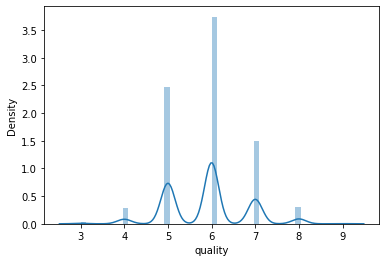

In [33]:
sns.distplot(y)

# Single CPU - TEst

In [31]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_repeats=3, random_state=42)
start_time = time()
scores  = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=1)
end_time = time()
print(end_time - start_time)

26.438854217529297


In [32]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_repeats=3, random_state=42)
start_time = time()
scores  = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=2)
end_time = time()
print(end_time - start_time)

36.54568839073181


# MUltiple CPU performance check

In [35]:
cores = [2,3,4,5,6,7,8,9,12,14,16]
Time_taken = []

for core in cores:
    model = RandomForestClassifier()
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=42)
    start_time = time()
    scores  = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=2)
    end_time = time()
    Time_taken.append(end_time - start_time)
    print(f'Core : {core}, Time taken : {end_time - start_time} secs.')

Core : 2, Time taken : 49.18744683265686 secs.
Core : 3, Time taken : 13.945080518722534 secs.
Core : 4, Time taken : 14.438986778259277 secs.
Core : 5, Time taken : 15.086434841156006 secs.
Core : 6, Time taken : 14.252938508987427 secs.
Core : 7, Time taken : 14.35161566734314 secs.
Core : 8, Time taken : 14.461349964141846 secs.
Core : 9, Time taken : 14.460553407669067 secs.
Core : 12, Time taken : 13.90888500213623 secs.
Core : 14, Time taken : 14.065217018127441 secs.
Core : 16, Time taken : 14.480590581893921 secs.


In [36]:
Time_taken

[49.18744683265686,
 13.945080518722534,
 14.438986778259277,
 15.086434841156006,
 14.252938508987427,
 14.35161566734314,
 14.461349964141846,
 14.460553407669067,
 13.90888500213623,
 14.065217018127441,
 14.480590581893921]

<IPython.core.display.Javascript object>

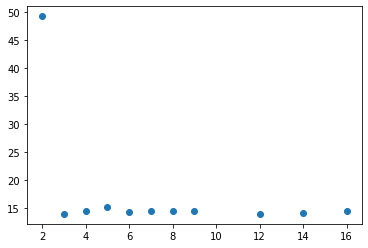

In [37]:
plt.scatter(cores, Time_taken)